# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student.

In [1]:
# stundent details example: John S. 9812
#                       student details 1: Omri A. 6398

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT-5
Goal: Syntax help and generate graph help
Propmpt1: how to connect collab to drive?
    
Propmpt2: give me the most simple example of random forest with gridsearch
    
Propmpt3: I want to show y_pred and y_test results in confusion matrix plot

Prompt4: fix this:
  plt.hist(train_set['Embarked'], bins=4, edgecolor='black')
  plt.xlabel('Embarktion Point')
  plt.ylabel('Number of Passengers')
  plt.title('Histogram of number of passengers per embarktion point')
  plt.show()
  to have only integers in the x axis and have the number above each histogram    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
The Titanic Dataset has a list of passengers and their survival status '1' survived and '0' died.
My task is to predict in the test set, if a passenger managed to survive or not.
The dataset contains the following features:
* PClass - The class passengers travelled in
* Sex - Gender of Passenger
* Age - Age of passenger
* SibSp - Number of siblings or spouse
* Parch - Parent or child
* Fare - Amount paid for the ticket
* Embarked - Point of embarkment
</pre>

## Part 2 - Initial Preparations
You could add as many code cells as needed

Imports

In [2]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Collab connection and loading datasets

In [3]:
# connect to google drive
data_path = "/content/drive"
drive.mount(data_path)
train_set = pd.read_csv(f"{data_path}/MyDrive/titanic/titanic_train.csv")
test_set = pd.read_csv(f"{data_path}/MyDrive/titanic/titanic_test.csv")

Mounted at /content/drive


Print Datasets

In [4]:
train_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [5]:
test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


### EDA

In [6]:
train_set.shape

(712, 8)

In [7]:
train_set.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


<pre>
The dataset contains 712 records.
All of the features are numeric values, and there are no missing values (count = 712 for all features).
We can see that there are 3 passenger classes.
There were 64% passengers from sex '1' and 36% from '0'.
The average age was 29 and a half, the youngest passenger was 8 months old while the oldest was 80 years old.
The average price of a ticket was 32.37, the cheapest was 0 (free) and the most expensive ticket was 512.33.
According to the "describe" function there were 4 points of embarktion, this is wrong and I need to check this.
More then 50% of the passengers embarked in the first location.
The survival rate in the training set was 39.46%.
</pre>

Embarked

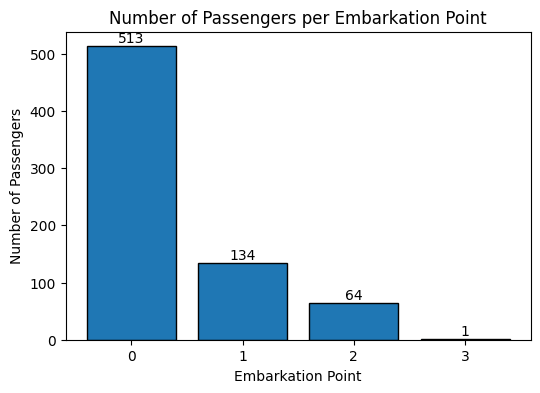

In [8]:
embark_counts = train_set['Embarked'].value_counts()

plt.figure(figsize=(6,4))
bars = plt.bar(range(len(embark_counts)), embark_counts.values,
               edgecolor='black')

plt.xticks(range(len(embark_counts)), embark_counts.index)

plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers per Embarkation Point')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(i, height + 1, str(height), ha='center', va='bottom', fontsize=10)

plt.show()

<pre>
There were 513 passengers from the first embarkation point.
134 from the second
64 from the third
and 1 from the non existing fourth point
this is probably a typing mistake and therefore I assume that '3' is actually '2'.
</pre>

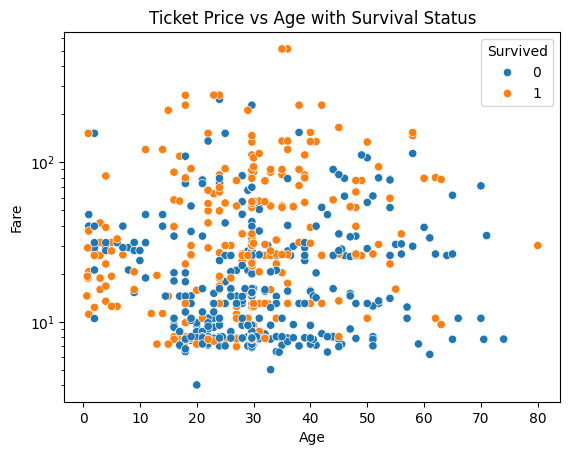

In [9]:
sns.scatterplot(data=train_set, x="Age", y="Fare", hue="Survived")
plt.yscale("log")
plt.title('Ticket Price vs Age with Survival Status')
plt.show()

<pre>
From the scatter plot we can see that kids had higher chance to survive than adults.
Also we can see that there is a correlation between the ticket price to the passenger survival rate,
the more expensive the ticket was the higher chance the passenger managed to survive the accident.
</pre>

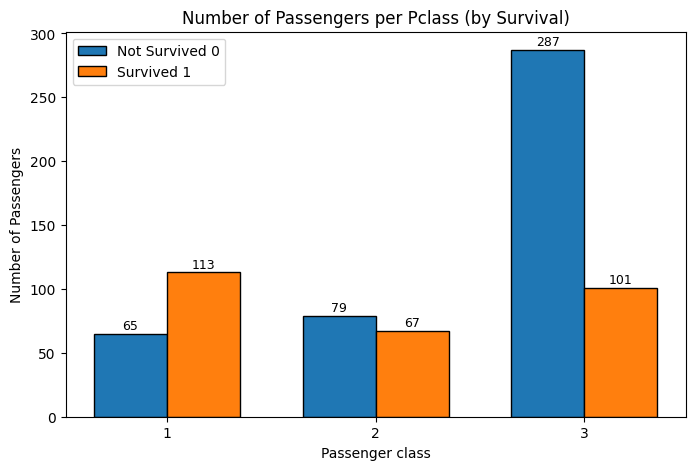

In [10]:
pclass_counts = train_set.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

plt.figure(figsize=(8,5))
bar_width = 0.35
x = range(len(pclass_counts))

bars1 = plt.bar([i - bar_width/2 for i in x], pclass_counts[0],
                width=bar_width, label='Not Survived 0', edgecolor='black')
bars2 = plt.bar([i + bar_width/2 for i in x], pclass_counts[1],
                width=bar_width, label='Survived 1', edgecolor='black')

plt.xticks(x, pclass_counts.index)
plt.xlabel('Passenger class')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers per Pclass (by Survival)')
plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
                 ha='center', va='bottom', fontsize=9)

plt.show()

<pre>
This bar plot shows the correlation between the passenger class to the survival rate.
From this graph we can see that the passengers had a higher chance to survive the lower their class number was.
Obviously first class is considered best.
</pre>

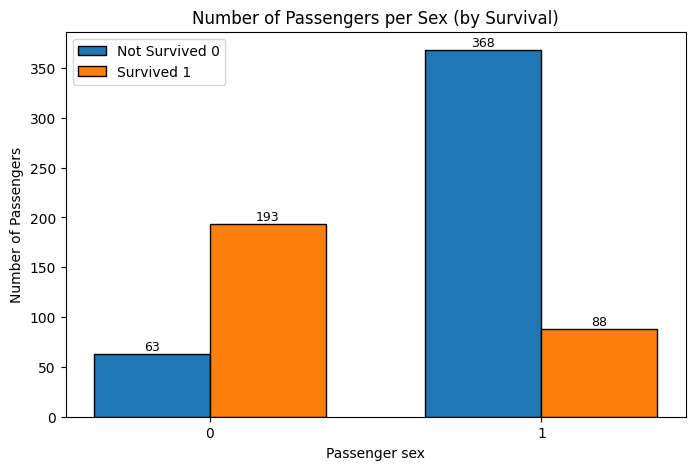

In [11]:
sex_counts = train_set.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

plt.figure(figsize=(8,5))
bar_width = 0.35
x = range(len(sex_counts))

bars1 = plt.bar([i - bar_width/2 for i in x], sex_counts[0],
                width=bar_width, label='Not Survived 0', edgecolor='black')
bars2 = plt.bar([i + bar_width/2 for i in x], sex_counts[1],
                width=bar_width, label='Survived 1', edgecolor='black')

plt.xticks(x, sex_counts.index)
plt.xlabel('Passenger sex')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers per Sex (by Survival)')
plt.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
                 ha='center', va='bottom', fontsize=9)

plt.show()

<pre>
This graph shows the connection between the passenger sex to their chance of survival.
We can see from this graph that passenger
with the value '0' had a significant higher chance to survive
while passenger with the value '1' had a lower rate of survival.
This suggests that the value '0' is female, and value '1' is male.

</pre>

<Axes: >

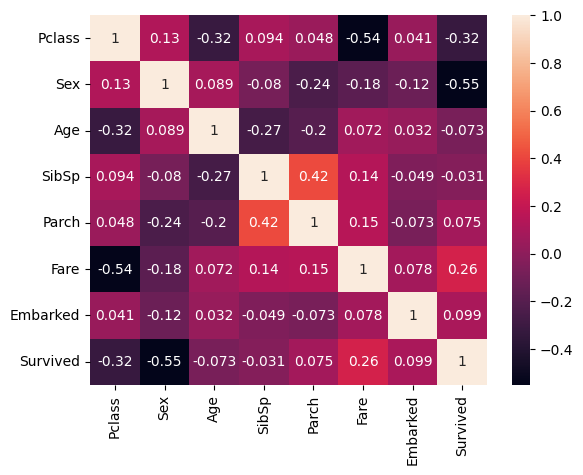

In [12]:
correlation = train_set.corr()
sns.heatmap(correlation, annot=True, cbar=True)

<pre>
Most of the features don't have high (positive or negative) correlation.
Fare has negative correlation with Pclass, higher ticket price to lower passenger class number
Sex has negative correlation with Survived, women survived more.
</pre>

Fixing Embark 4th point

<pre>
Fixed 4th Embark point, titanic had only 3 embark point before the accident,
only one passenger had the value 3 which makes me believe this is a typo and they meant to put 2.
</pre>

In [13]:
train_set.loc[train_set['Embarked'] >= 3, 'Embarked'] = 2
test_set.loc[test_set['Embarked'] >= 3, 'Embarked'] = 2

In [14]:
train_set['Embarked'].unique()

array([1, 0, 2])

In [15]:
test_set['Embarked'].unique()

array([0, 2, 1])

## Part 3 - Experiments
You could add as many code cells as needed

Seperating to X and y

In [16]:
X_train = train_set.drop("Survived", axis=1, inplace=False)
y_train = train_set['Survived']

In [17]:
X_test = test_set.drop("Survived", axis=1, inplace=False)
y_test = test_set['Survived']

Baseline Model KNN:

At first I'll try using KNN without any scalling

In [18]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ["euclidean", "manhattan"],
}

grid = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1,
                    scoring = make_scorer(f1_score, average="binary"))

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best CV Score: 0.6467295114024085


Showing results of all premutations

In [19]:
df = pd.DataFrame(grid.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.005487      0.001143         0.009649        0.000716    euclidean   
1        0.004339      0.000101         0.007850        0.000482    euclidean   
2        0.004530      0.000122         0.010008        0.000935    euclidean   
3        0.005108      0.000724         0.008155        0.000262    euclidean   
4        0.008417      0.004057         0.015040        0.007941    euclidean   
5        0.004378      0.000092         0.008184        0.000214    euclidean   
6        0.004318      0.000076         0.009084        0.000063    manhattan   
7        0.004374      0.000118         0.007995        0.000202    manhattan   
8        0.004230      0.000040         0.009144        0.000148    manhattan   
9        0.005078      0.001440         0.008088        0.000255    manhattan   
10       0.004432      0.000148         0.009137        0.000077    manhattan   
11       0.004378      0.000

Scalling with StandardScaler


In [20]:
scaler = StandardScaler()

In [21]:
X_train_scaler = X_train.copy(deep=False)
X_test_scaler = X_test.copy(deep=False)

In [22]:
X_train_scaler = scaler.fit_transform(X_train_scaler)

In [23]:
X_test_scaler = scaler.transform(X_test_scaler)

Experimenting KNN with StandardScaler

In [24]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ["euclidean", "manhattan"],
}

grid = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1,
                    scoring = make_scorer(f1_score, average="binary"))

grid.fit(X_train_scaler, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best CV Score: 0.7405730488920731


In [25]:
df = pd.DataFrame(grid.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.002744      0.000071         0.008823        0.000542    euclidean   
1        0.002635      0.000056         0.007057        0.000131    euclidean   
2        0.002587      0.000061         0.008391        0.000149    euclidean   
3        0.002514      0.000059         0.007330        0.000110    euclidean   
4        0.002683      0.000099         0.008578        0.000147    euclidean   
5        0.003801      0.001720         0.008705        0.000702    euclidean   
6        0.002668      0.000052         0.009069        0.001248    manhattan   
7        0.002819      0.000193         0.007813        0.000500    manhattan   
8        0.002606      0.000035         0.008618        0.000157    manhattan   
9        0.002470      0.000064         0.007482        0.000148    manhattan   
10       0.002630      0.000084         0.009072        0.000160    manhattan   
11       0.002463      0.000

Preparing PCA data

In [26]:
pca = PCA(n_components=5)

In [27]:
X_train_PCA = X_train.copy(deep=False)
X_test_PCA = X_test.copy(deep=False)

In [28]:
X_train_PCA = pca.fit_transform(X_train_PCA)

In [29]:
X_test_PCA = pca.transform(X_test_PCA)

Random Forest:

Experimenting with Random Forest without PCA

In [30]:
#Put all the combination of the result in df and show the results

In [31]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 25, 35],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [None, 'balanced'],
}

grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1,
                    scoring = make_scorer(f1_score, average="binary"))

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 35}
Best CV Score: 0.7595577925608923


##### Showing the results of all the permutation

In [32]:
df = pd.DataFrame(grid.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.036480      0.000998         0.008789        0.000717   
1        0.086825      0.016557         0.011270        0.001289   
2        0.106112      0.007671         0.011626        0.000253   
3        0.039758      0.011243         0.010831        0.004576   
4        0.132602      0.033004         0.017861        0.004559   
..            ...           ...              ...             ...   
67       0.156423      0.007963         0.016753        0.004297   
68       0.181684      0.025247         0.018032        0.006161   
69       0.067463      0.005708         0.015145        0.001208   
70       0.130992      0.022020         0.015034        0.004709   
71       0.167187      0.026830         0.014687        0.005578   

   param_class_weight  param_max_depth  param_min_samples_leaf  \
0                None                3                       1   
1                None                3             

Experimenting with Random Forest and PCA

In [33]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 25, 35],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [None, 'balanced'],
}

grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1,
                    scoring = make_scorer(f1_score, average="binary"))

grid.fit(X_train_PCA, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 25}
Best CV Score: 0.6674368421980954


PCA did worse than regular X_train, therefore I will not use it.

## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [34]:
final_model = RandomForestClassifier(n_estimators=35, min_samples_split=2, min_samples_leaf=2,
                                     max_depth=4, class_weight='balanced')
clf = final_model.fit(X_train, y_train)

## Part 5 - Apply on test and show model performance estimation

In [35]:
y_predict = clf.predict(X_test)
score = f1_score(y_test, y_predict)
print(f"The F1 score: {score}")

The F1 score: 0.7741935483870968


In [36]:
df_preds = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_predict
})

print(df_preds.head())

   y_test  y_pred
0       0       0
1       0       0
2       0       0
3       0       1
4       1       0


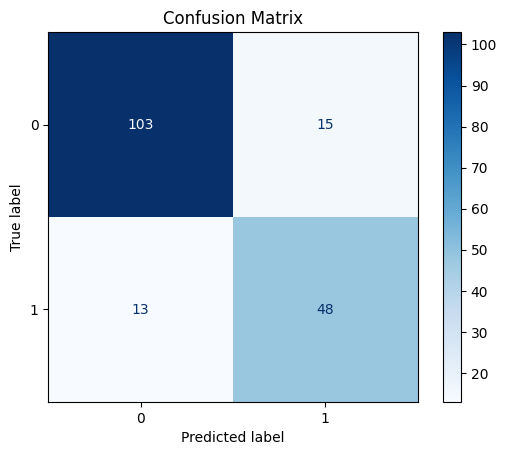

In [37]:
cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()